# Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
from scipy import stats

In [ ]:
!pip install sodapy
from sodapy import Socrata
client = Socrata("data.cityofnewyork.us", None)
results = client.get("kxp8-n2sj", limit=1000000)
df = pd.DataFrame.from_records(results)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   vendorid               1000000 non-null  object
 1   tpep_pickup_datetime   1000000 non-null  object
 2   tpep_dropoff_datetime  1000000 non-null  object
 3   passenger_count        1000000 non-null  object
 4   trip_distance          1000000 non-null  object
 5   ratecodeid             1000000 non-null  object
 6   store_and_fwd_flag     1000000 non-null  object
 7   pulocationid           1000000 non-null  object
 8   dolocationid           1000000 non-null  object
 9   payment_type           1000000 non-null  object
 10  fare_amount            1000000 non-null  object
 11  extra                  1000000 non-null  object
 12  mta_tax                1000000 non-null  object
 13  tip_amount             1000000 non-null  object
 14  tolls_amount           1000000 non-

In [ ]:
df.head(10)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01T00:28:15.000,2020-01-01T00:33:03.000,1,1.20,1,N,238,239,1,6,3,0.5,1.47,0,0.3,11.27,2.5
1,1,2020-01-01T00:35:39.000,2020-01-01T00:43:04.000,1,1.20,1,N,239,238,1,7,3,0.5,1.5,0,0.3,12.3,2.5
2,1,2020-01-01T00:47:41.000,2020-01-01T00:53:52.000,1,0.60,1,N,238,238,1,6,3,0.5,1,0,0.3,10.8,2.5
3,1,2020-01-01T00:55:23.000,2020-01-01T01:00:14.000,1,0.80,1,N,238,151,1,5.5,0.5,0.5,1.36,0,0.3,8.16,0
4,2,2020-01-01T00:01:58.000,2020-01-01T00:04:16.000,1,0.00,1,N,193,193,2,3.5,0.5,0.5,0,0,0.3,4.8,0
5,2,2020-01-01T00:09:44.000,2020-01-01T00:10:37.000,1,0.03,1,N,7,193,2,2.5,0.5,0.5,0,0,0.3,3.8,0
6,2,2020-01-01T00:39:25.000,2020-01-01T00:39:29.000,1,0.00,1,N,193,193,1,2.5,0.5,0.5,0.01,0,0.3,3.81,0
7,2,2019-12-18T15:27:49.000,2019-12-18T15:28:59.000,1,0.00,5,N,193,193,1,0.01,0,0,0,0,0.3,2.81,2.5
8,2,2019-12-18T15:30:35.000,2019-12-18T15:31:35.000,4,0.00,1,N,193,193,1,2.5,0.5,0.5,0,0,0.3,6.3,2.5
9,1,2020-01-01T00:29:01.000,2020-01-01T00:40:28.000,2,0.70,1,N,246,48,1,8,3,0.5,2.35,0,0.3,14.15,2.5


# Xử lý data

##Thay đổi kiểu dữ liệu

Thay đổi kiểu dữ liệu cho các cột để phù hợp cho việc phân tích.

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

Thay đổi 2 cột 'tpep_pickup_datetime'&'tpep_dropoff_datetime' về định dạng ngày để dễ xử lý.

In [ ]:
df[['trip_distance','fare_amount','tip_amount','tolls_amount','total_amount',]]=df[['trip_distance','fare_amount','tip_amount','tolls_amount','total_amount',]].astype(float)

Các thuộc tính liên tục sẽ được đưa hết về dạng Float

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   vendorid               1000000 non-null  object        
 1   tpep_pickup_datetime   1000000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1000000 non-null  datetime64[ns]
 3   passenger_count        1000000 non-null  object        
 4   trip_distance          1000000 non-null  float64       
 5   ratecodeid             1000000 non-null  object        
 6   store_and_fwd_flag     1000000 non-null  object        
 7   pulocationid           1000000 non-null  object        
 8   dolocationid           1000000 non-null  object        
 9   payment_type           1000000 non-null  object        
 10  fare_amount            1000000 non-null  float64       
 11  extra                  1000000 non-null  object        
 12  mta_tax                100000

In [ ]:
df.describe()

,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount
count,1000000.00000,1000000.00000,1000000.000000,1000000.000000,1000000.000000
mean,3.11482,12.90728,2.076408,0.379730,18.712602
std,4.14321,12.93358,2.861873,1.930441,15.667134
min,-22.18000,-1238.00000,-7.000000,-30.000000,-1242.300000
25%,0.99000,6.00000,0.000000,0.000000,10.800000
50%,1.66000,9.00000,1.750000,0.000000,13.800000
75%,3.13000,14.00000,2.750000,0.000000,19.560000
max,259.22000,1238.00000,450.000000,910.500000,1242.300000


##Duration

Thêm vào thuộc tính 'Duration', thuộc tính này có ý nghĩa là khoảng thời gian hành khách lên xe.

In [ ]:
df_new2=df['tpep_pickup_datetime'].copy()
df_new3=df['tpep_dropoff_datetime'].copy()

In [ ]:
df['duration']=df_new3-df_new2

In [ ]:
df_new_2=df['duration'].copy()

In [ ]:
import datetime as dt
df_new_2=df_new_2.dt.total_seconds()
df_new_2=df_new_2/60

In [ ]:
df['duration']=df_new_2.copy()
df['duration']

0          4.800000
1          7.416667
2          6.183333
3          4.850000
4          2.300000
            ...    
999995    16.866667
999996     5.850000
999997    10.916667
999998     6.916667
999999    15.183333
Name: duration, Length: 1000000, dtype: float64

In [ ]:
df=df[(df['duration']>0)]

##Time

Thuộc tính 'Time' được thêm vào là mốc thời gian mà hành khách lên xe. 

In [ ]:
df['time']=df['tpep_pickup_datetime'].dt.hour

In [ ]:
df.head(10)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,time
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.20,1,N,238,239,1,6.00,3,0.5,1.47,0.0,0.3,11.27,2.5,4.800000,0
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.20,1,N,239,238,1,7.00,3,0.5,1.50,0.0,0.3,12.30,2.5,7.416667,0
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.60,1,N,238,238,1,6.00,3,0.5,1.00,0.0,0.3,10.80,2.5,6.183333,0
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.80,1,N,238,151,1,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0,4.850000,0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.00,1,N,193,193,2,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0,2.300000,0
5,2,2020-01-01 00:09:44,2020-01-01 00:10:37,1,0.03,1,N,7,193,2,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0,0.883333,0
6,2,2020-01-01 00:39:25,2020-01-01 00:39:29,1,0.00,1,N,193,193,1,2.50,0.5,0.5,0.01,0.0,0.3,3.81,0,0.066667,0
7,2,2019-12-18 15:27:49,2019-12-18 15:28:59,1,0.00,5,N,193,193,1,0.01,0,0,0.00,0.0,0.3,2.81,2.5,1.166667,15
8,2,2019-12-18 15:30:35,2019-12-18 15:31:35,4,0.00,1,N,193,193,1,2.50,0.5,0.5,0.00,0.0,0.3,6.30,2.5,1.000000,15
9,1,2020-01-01 00:29:01,2020-01-01 00:40:28,2,0.70,1,N,246,48,1,8.00,3,0.5,2.35,0.0,0.3,14.15,2.5,11.450000,0


##tpep_pickup_datetime

Thuộc tính 'tpep_pickup_datetime' sẽ được chuyển sang định dạng thứ trong tuần thay vì là ngày/tháng/năm. Ta sẽ lược bỏ bớt những mốc thời gian không phù hợp. Thuộc tính 'tpep_pickup_datetime' sẽ được đổi tên lại là 'day_of_week' cho phù hợp với ý nghĩa thuộc tính.

In [ ]:
df_new=df['tpep_pickup_datetime'].copy()
df_new=df_new.astype(str)
df['tpep_pickup_datetime']=df_new.str[:-9]
df['tpep_pickup_datetime']

0         2020-01-01
1         2020-01-01
2         2020-01-01
3         2020-01-01
4         2020-01-01
             ...    
999995    2020-01-06
999996    2020-01-06
999997    2020-01-06
999998    2020-01-06
999999    2020-01-06
Name: tpep_pickup_datetime, Length: 999322, dtype: object

In [ ]:
value=['2019-12-18','2019-12-31','2009-01-01','2021-01-02','2008-12-31','2003-01-01']
df=df[df.tpep_pickup_datetime.isin(value)==False]

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [ ]:
df['tpep_pickup_datetime']=df['tpep_pickup_datetime'].dt.weekday

In [ ]:
from collections import Counter
df_tpep_pickup_datetime_count=df['tpep_pickup_datetime'].copy()
cnt=Counter(df_tpep_pickup_datetime_count)
df_psg=pd.DataFrame.from_dict(cnt, orient='index')
df_psg.rename(columns={'index':'index',0:'value'})

,value
2,168462
3,160182
4,181406
5,181595
6,162919
0,144583
1,34


Thống kê số lượng xe theo các ngày trong tuần.

In [ ]:
df=df.rename(columns={"tpep_pickup_datetime":"day_of_week"})

##tpep_dropoff_datetime

Loại bỏ thuộc tính 'tpep_dropoff_datetime' vì không cần sử dụng trong phân tích.

In [ ]:
df.drop('tpep_dropoff_datetime',axis=1, inplace=True) # drop tpep_dropoff_datetime column

##passenger_count

Loại bỏ đi những dữ liệu không phù hợp như các dữ liệu có số lượng 8,9 vì taxi tối đa là 7 hành khách. Dữ liệu ở cột 'passenger_count' là dữ liệu được tài xế nhập vào nên có thể có sai sót.

In [ ]:
# Loại bỏ các dữ liệu có số lượng passenger là 8,9 vì taxi tối đa là 7 hành khách.
value_passenger=['9','8']  
df=df[df.passenger_count.isin(value_passenger)==False]

##total_amount

loại bỏ các giá trị tiền nhận được âm

In [ ]:
df=df[(df['total_amount']>0)]

##trip_distance

loại bỏ các giá trị khoảng cách âm 

In [ ]:
df=df[(df['trip_distance']>0)]

In [ ]:
df.head(10)

,vendorid,day_of_week,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,time
0,1,2,1,1.20,1,N,238,239,1,6.0,3,0.5,1.47,0.0,0.3,11.27,2.5,4.800000,0
1,1,2,1,1.20,1,N,239,238,1,7.0,3,0.5,1.50,0.0,0.3,12.30,2.5,7.416667,0
2,1,2,1,0.60,1,N,238,238,1,6.0,3,0.5,1.00,0.0,0.3,10.80,2.5,6.183333,0
3,1,2,1,0.80,1,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0,4.850000,0
5,2,2,1,0.03,1,N,7,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0,0.883333,0
9,1,2,2,0.70,1,N,246,48,1,8.0,3,0.5,2.35,0.0,0.3,14.15,2.5,11.450000,0
10,1,2,2,2.40,1,N,246,79,1,12.0,3,0.5,1.75,0.0,0.3,17.55,2.5,16.866667,0
11,1,2,1,0.80,1,N,163,161,2,9.5,3,0.5,0.00,0.0,0.3,13.30,2.5,14.433333,0
12,1,2,1,3.30,1,N,161,144,1,17.0,3,0.5,4.15,0.0,0.3,24.95,2.5,25.283333,0
13,2,2,1,1.07,1,N,43,239,1,6.0,0.5,0.5,1.96,0.0,0.3,11.76,2.5,5.616667,0


In [ ]:
df.describe()

,day_of_week,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,duration,time
count,986174.000000,986174.000000,986174.000000,986174.000000,986174.000000,986174.000000,986174.000000,986174.000000
mean,3.433213,3.151618,12.792671,2.067237,0.376630,18.625335,15.821323,13.146253
std,1.912923,4.153618,12.196056,2.785432,1.921701,14.934993,68.638066,6.171590
min,0.000000,0.010000,0.000000,0.000000,0.000000,0.300000,0.016667,0.000000
25%,2.000000,1.000000,6.000000,0.000000,0.000000,10.800000,6.033333,9.000000
50%,4.000000,1.690000,9.000000,1.760000,0.000000,13.800000,9.916667,14.000000
75%,5.000000,3.180000,13.500000,2.750000,0.000000,19.550000,16.000000,18.000000
max,6.000000,259.220000,1238.000000,450.000000,910.500000,1242.300000,2458.400000,23.000000


#Train model

##Random Forest

In [ ]:
!pip install -q fastai --upgrade 

     |████████████████████████████████| 189 kB 7.6 MB/s 
     |████████████████████████████████| 56 kB 5.5 MB/s 


In [ ]:
# import 
from sklearn.ensemble import RandomForestRegressor
from fastai.tabular.all import *
import seaborn as sns 
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



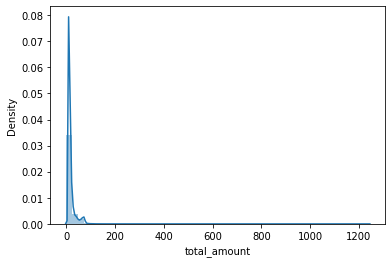

In [ ]:
sns.distplot(df['total_amount'])

In [ ]:
df_100 = df[(df['total_amount']<100)]

In [ ]:
df.shape

(986174, 19)

In [ ]:
df_100.shape, df.shape

((984355, 19), (986174, 19))

In [ ]:
# tiền xử lý trước khi huấn luyện mô hình
cat_vars =['vendorid','day_of_week','passenger_count','ratecodeid','store_and_fwd_flag','pulocationid','dolocationid','payment_type','extra',
           'mta_tax','improvement_surcharge', 'congestion_surcharge'] # các biến phân loại
cont_vars =['trip_distance','fare_amount','tip_amount','tolls_amount','duration','time'] #các biến liên tục
dep_var = 'total_amount' # biến phụ thuộc
procs = [Categorify,Normalize] # chuyển các biến phân loại về dạng Category
splits = RandomSplitter(valid_pct=0.2,seed=42)(range_of(df_100)) # chia 20% cho tập valid
to = TabularPandas(df_100, procs, cat_vars, cont_vars, dep_var, y_block=RegressionBlock(),
                   splits=splits, inplace=True, reduce_memory=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/core.py:148: UserWarning:

Using inplace with splits will trigger a pandas error. Set `pd.options.mode.chained_assignment=None` to avoid it.



In [ ]:
len(to.train), len(to.valid)

(787484, 196871)

In [ ]:
to.show(3) # df trước khi xử lý

,vendorid,day_of_week,passenger_count,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,extra,mta_tax,improvement_surcharge,congestion_surcharge,trip_distance,fare_amount,tip_amount,tolls_amount,duration,time,total_amount
34294,1,2,0,1,N,239,41,1,3,0.5,0.3,2.5,1.90,8.0,2.00,0.0,7.300000,2.0,13.800000
689928,2,5,1,1,N,79,233,1,0.5,0.5,0.3,2.5,3.85,14.5,3.66,0.0,14.133333,23.0,21.959999
455026,1,4,2,1,N,43,43,1,3.5,0.5,0.3,2.5,2.20,8.5,3.50,0.0,6.983333,18.0,16.299999


In [ ]:
to.items.head(3) # df sau khi xử lý

,vendorid,day_of_week,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,time
34294,1,3,1,-0.302546,1,1,144,197,1,-0.411887,12,2,-0.015886,-0.230018,2,13.800000,3,-0.123529,-1.807028
689928,2,6,2,0.184978,1,1,225,145,1,0.168658,3,2,0.636767,-0.230018,2,21.959999,3,-0.023546,1.596542
455026,1,5,3,-0.227543,1,1,189,199,1,-0.367230,13,2,0.573861,-0.230018,2,16.299999,3,-0.128162,0.786168


In [ ]:
xs, y = to.train.xs, to.train.y
valid_xs , valid_y = to.valid.xs, to.valid.y

In [ ]:
xs.shape, y.shape

((787484, 18), (787484,))

In [ ]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 5)

In [ ]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=40,max_samples=0.5, max_features=0.5,min_samples_leaf=10, oob_score=True) # model
rf.fit(xs, y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



RandomForestRegressor(max_features=0.5, max_samples=0.5, min_samples_leaf=10,
                      n_estimators=40, n_jobs=-1, oob_score=True)

In [ ]:
r_mse(rf.predict(xs),y), r_mse(rf.predict(valid_xs),valid_y) # RMSE score

(0.41517, 0.45419)

In [ ]:
r_mse(rf.oob_prediction_,y)

0.45289

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



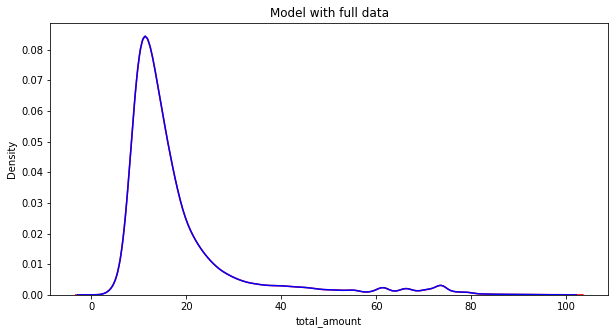

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
ax1 = sns.distplot(valid_y, hist=False, color="r", label="Actual Value")
sns.distplot(rf.predict(valid_xs), hist = False, color = 'b', label = 'Fitted Values', ax = ax1)
plt.title("Model with full data")
plt.show()

## Random Forest on data_dropped

In [ ]:
xs_dr = xs.drop(['vendorid','store_and_fwd_flag','payment_type','day_of_week','improvement_surcharge','time','passenger_count','duration'],axis=1)
valid_xs_dr = valid_xs.drop(['vendorid','store_and_fwd_flag','payment_type','day_of_week','improvement_surcharge','time','passenger_count','payment_type','duration'],axis=1)
rf_dr = RandomForestRegressor(n_jobs=-1, n_estimators=40,max_samples=0.5, max_features=0.5,min_samples_leaf=10, oob_score=True) # model
rf_dr.fit(xs_dr, y)
r_mse(rf_dr.predict(xs_dr),y),r_mse(rf_dr.predict(valid_xs_dr), valid_y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



(0.41174, 0.45106)

In [ ]:
r_mse(rf_dr.oob_prediction_, y)

0.44888

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



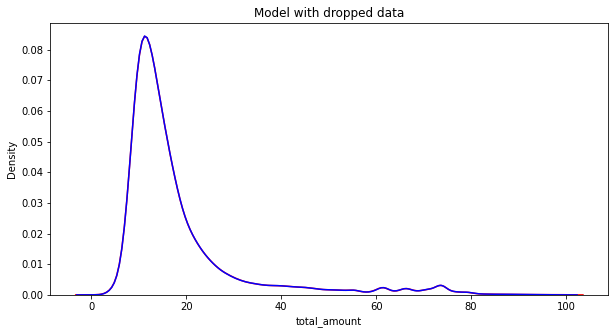

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
ax1 = sns.distplot(valid_y, hist=False, color="r", label="Actual Value")
sns.distplot(rf_dr.predict(valid_xs_dr), hist = False, color = 'b', label = 'Fitted Values', ax = ax1)
plt.title("Model with dropped data")
plt.show()

In [ ]:
save_pickle('rf_dropped_model.pkl',rf_dr) # lưu model
save_pickle('rf_model.pkl',rf)

## Neuron Network

In [ ]:
dls = to.dataloaders(batch_size=1024) # đưa data vào dataloaders với bs =1024

In [ ]:
to.cats.head(3)

,vendorid,day_of_week,passenger_count,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,extra,mta_tax,improvement_surcharge,congestion_surcharge
34294,1,3,1,1,1,144,197,1,12,2,2,3
689928,2,6,2,1,1,225,145,1,3,2,2,3
455026,1,5,3,1,1,189,199,1,13,2,2,3


In [ ]:
to.conts.head(3)

,trip_distance,fare_amount,tip_amount,tolls_amount,duration,time
34294,-0.302546,-0.411887,-0.015886,-0.230018,-0.123529,-1.807028
689928,0.184978,0.168658,0.636767,-0.230018,-0.023546,1.596542
455026,-0.227543,-0.367230,0.573861,-0.230018,-0.128162,0.786168


In [ ]:
dls.show_batch()

,vendorid,day_of_week,passenger_count,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,extra,mta_tax,improvement_surcharge,congestion_surcharge,trip_distance,fare_amount,tip_amount,tolls_amount,duration,time,total_amount
0,2,0,3,1,N,48,163,1,0,0.5,0.3,2.5,1.54,7.500000,2.160000e+00,-2.278336e-09,8.066666,9.0,12.960000
1,2,5,5,1,N,90,256,1,0.5,0.5,0.3,2.5,4.88,19.500000,-4.218575e-08,-2.278336e-09,23.133333,1.0,23.299999
2,2,4,1,1,N,79,232,1,0,0.5,0.3,2.5,1.34,7.000000,2.000000e+00,-2.278336e-09,7.566667,7.0,12.300000
3,2,6,1,1,N,48,177,2,0.5,0.5,0.3,2.5,10.63,33.000000,-4.218575e-08,-2.278336e-09,33.349997,23.0,36.799999
4,1,6,1,1,N,87,50,1,2.5,0.5,0.3,2.5,4.80,17.500000,6.200000e+00,-2.278336e-09,19.683332,10.0,27.000000
5,2,0,1,1,N,132,223,2,0,0.5,0.3,0,13.40,38.500001,-4.218575e-08,-2.278336e-09,31.283333,10.0,39.299999
6,2,2,2,1,N,138,232,1,0,0.5,0.3,2.5,9.54,29.000000,8.080000e+00,-2.278336e-09,20.750000,10.0,40.380001
7,1,3,1,1,N,234,234,2,3,0.5,0.3,2.5,0.70,6.000000,-4.218575e-08,-2.278336e-09,6.833333,20.0,9.800000
8,2,0,1,1,N,193,193,2,0,0.5,0.3,0,0.59,4.500000,-4.218575e-08,-2.278336e-09,3.550000,8.0,5.300000
9,2,5,5,1,N,79,256,2,0,0.5,0.3,2.5,3.39,13.500000,-4.218575e-08,-2.278336e-09,13.433333,14.0,16.799999


In [ ]:
emb_szs = get_emb_sz(to)
print(emb_szs) # số latten factors của mỗi biến phân loại

[(3, 3), (8, 5), (9, 5), (8, 5), (3, 3), (247, 35), (261, 36), (5, 4), (17, 8), (4, 3), (3, 3), (5, 4)]


In [ ]:
batch = dls.one_batch()

In [ ]:
batch[0][0], batch[1][0], batch[2][0] 

(tensor([ 1,  6,  2,  1,  1, 75, 94,  1, 10,  2,  2,  3]),
 tensor([-0.4526, -0.4119, -0.1338, -0.2300, -0.0721,  0.4620]),
 tensor([13.]))

In [ ]:
to.train.y.min(), to.train.y.max()

(0.30000001192092896, 99.95999908447266)

In [ ]:
learn = tabular_learner(dls, y_range=(0,100), layers=[300,200],
                        n_out=1, loss_func =MSELossFlat(), metrics= rmse)
# model với miền giá trị của y từ 0 tới 100, layer đầu có 300 nơ ron layer tiếp theo có 200 nơ ron.

In [ ]:
learn.summary()

TabularModel (Input shape: 1024 x 12)
Layer (type)         Output Shape         Param #    Trainable 
                     1024 x 3            
Embedding                                 9          True      
____________________________________________________________________________
                     1024 x 5            
Embedding                                 40         True      
Embedding                                 45         True      
Embedding                                 40         True      
____________________________________________________________________________
                     1024 x 3            
Embedding                                 9          True      
____________________________________________________________________________
                     1024 x 35           
Embedding                                 8645       True      
____________________________________________________________________________
                     1024 x 36        

SuggestedLRs(valley=0.0020892962347716093)

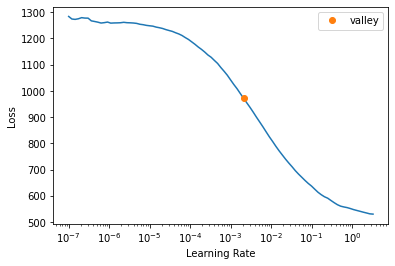

In [ ]:
learn.lr_find() # tìm lr phù hợp với model

In [ ]:
learn.fit_one_cycle(8,3e-4,wd=0.1)

epoch,train_loss,valid_loss,_rmse,time
0,113.597557,108.408585,10.411943,00:10
1,109.510628,107.999756,10.392292,00:10
2,53.793995,25.192047,5.019168,00:10
3,9.675529,5.297167,2.301558,00:10
4,0.853544,0.315859,0.562013,00:10
5,0.630577,0.184702,0.429770,00:10
6,0.453606,0.148627,0.385522,00:10
7,0.428976,0.125883,0.354800,00:10


In [ ]:
preds,targs = learn.get_preds()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



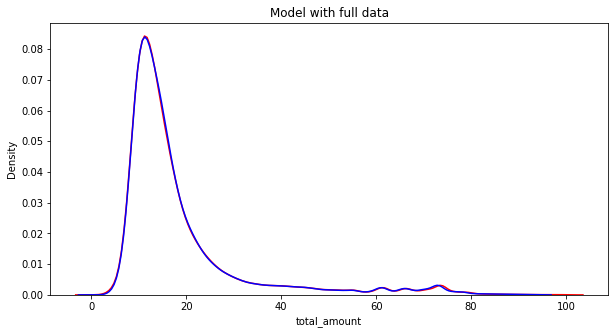

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
ax1 = sns.distplot(valid_y, hist=False, color="r", label="Actual Value")
sns.distplot(to_np(preds.squeeze()), hist = False, color = 'b', label = 'Fitted Values', ax = ax1)
plt.title("Model with full data")
plt.show()

In [ ]:
learn.export('nn_model')

## Neural Network with dropped data

In [ ]:
df_nn = df_100.drop(['vendorid','store_and_fwd_flag','payment_type','day_of_week','improvement_surcharge','time','passenger_count','duration'],axis=1)
cat_vars =['ratecodeid','pulocationid','dolocationid','extra','mta_tax', 'congestion_surcharge'] # các biến phân loại
cont_vars =['trip_distance','fare_amount','tip_amount','tolls_amount'] #các biến liên tục
dep_var = 'total_amount' # biến phụ thuộc
procs = [Categorify,Normalize] # chuyển các biến phân loại về dạng Category
splits = RandomSplitter(valid_pct=0.2,seed=42)(range_of(df_100)) # chia 20% cho tập valid
to = TabularPandas(df_nn, procs, cat_vars, cont_vars, dep_var, y_block=RegressionBlock(),
                   splits=splits, inplace=True, reduce_memory=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/core.py:148: UserWarning:

Using inplace with splits will trigger a pandas error. Set `pd.options.mode.chained_assignment=None` to avoid it.



In [ ]:
dls = to.dataloaders(batch_size=1024) # đưa data vào dataloaders với bs =1024

In [ ]:
ob = dls.one_batch()
ob[0][0], ob[1][0], ob[2][0]

(tensor([  1,  25, 143,   3,   2,   3]),
 tensor([-0.6276, -0.7691, -0.1889, -0.2300]),
 tensor([9.3600]))

In [ ]:
dls.show_batch()

,ratecodeid,pulocationid,dolocationid,extra,mta_tax,congestion_surcharge,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount
0,1,234,114,0,0.5,2.5,0.72,4.5,3.803586e-08,-6.696812e-09,7.800000
1,1,100,43,2.5,0.5,2.5,2.20,12.0,3.803586e-08,-6.696812e-09,15.300000
2,1,229,233,0,0.5,2.5,0.75,4.5,1.000000e+00,-6.696812e-09,8.800000
3,1,113,50,3.5,0.5,2.5,3.50,15.5,5.900000e+00,-6.696812e-09,25.700001
4,1,231,211,0.5,0.5,2.5,0.22,4.0,1.560000e+00,-6.696812e-09,9.360000
5,2,68,132,7,0.5,2.5,17.40,52.0,3.803586e-08,6.120000e+00,65.919998
6,1,163,233,2.5,0.5,2.5,1.90,10.0,2.650000e+00,-6.696812e-09,15.950000
7,1,148,234,0.5,0.5,2.5,2.65,11.5,1.000000e+00,-6.696812e-09,16.299999
8,1,151,116,0,0.5,0,3.00,11.5,3.803586e-08,-6.696812e-09,12.300000
9,1,246,100,0,0.5,2.5,1.22,8.0,3.803586e-08,-6.696812e-09,11.300000


In [ ]:
learn = tabular_learner(dls, y_range=(0,100), layers=[300,200],
                        n_out=1, loss_func =MSELossFlat(), metrics= rmse)

In [ ]:
learn.summary()

TabularModel (Input shape: 1024 x 6)
Layer (type)         Output Shape         Param #    Trainable 
                     1024 x 5            
Embedding                                 40         True      
____________________________________________________________________________
                     1024 x 35           
Embedding                                 8645       True      
____________________________________________________________________________
                     1024 x 36           
Embedding                                 9396       True      
____________________________________________________________________________
                     1024 x 8            
Embedding                                 136        True      
____________________________________________________________________________
                     1024 x 3            
Embedding                                 12         True      
_____________________________________________________________

SuggestedLRs(valley=0.001737800776027143)

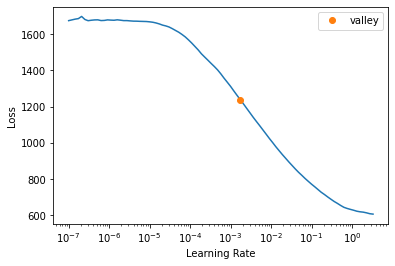

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(8,3e-4, wd=0.1)

epoch,train_loss,valid_loss,_rmse,time
0,117.756683,111.399269,10.554585,00:09
1,112.413933,107.967522,10.390739,00:09
2,22.608315,15.959035,3.994876,00:09
3,11.699695,9.148288,3.024614,00:09
4,0.633389,0.553543,0.744005,00:09
5,0.567862,0.529307,0.727535,00:09
6,0.338085,0.123436,0.351335,00:09
7,0.323939,0.102272,0.319800,00:09


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



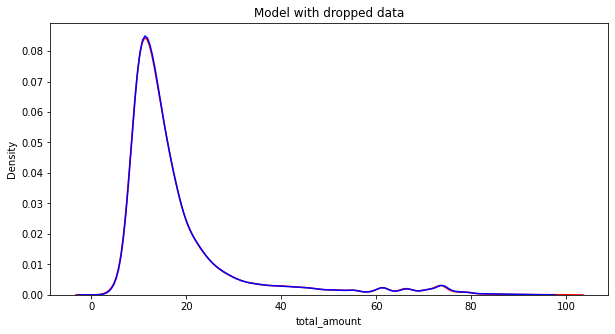

In [ ]:
preds, targs = learn.get_preds()
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
ax1 = sns.distplot(valid_y, hist=False, color="r", label="Actual Value")
sns.distplot(to_np(preds.squeeze()), hist = False, color = 'b', label = 'Fitted Values', ax = ax1)
plt.title("Model with dropped data")
plt.show()

#Inference

In [ ]:
test_df = df_nn.sample(100)
dl = learn.dls.test_dl(test_df)

In [ ]:
preds, targs =learn.get_preds(dl=dl)

In [ ]:
r_mse(preds, targs)

0.23223

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



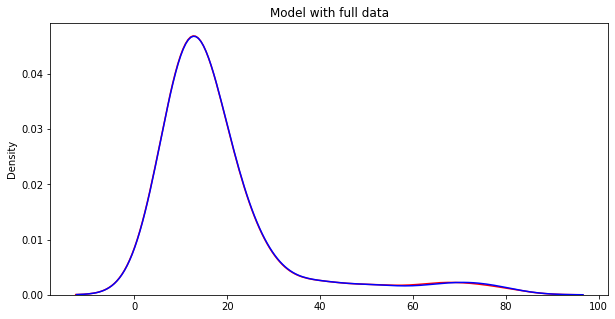

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
ax1 = sns.distplot(to_np(targs.squeeze()), hist=False, color="r", label="Actual Value")
sns.distplot(to_np(preds.squeeze()), hist = False, color = 'b', label = 'Fitted Values', ax = ax1)
plt.title("Model with full data")
plt.show()

In [ ]:
learn.export('dropped_model')